# Pfizer Vaccine Twitter Data Analysis

Name: Vinaya Chinti

Dataset Link: https://www.kaggle.com/gpreda/pfizer-vaccine-tweets

Dataset Source: Kaggle

Related Topics: Natural Language processing, WordCloud, Plotly

In this project I have used the twitter data related to the pfizer vaccine and analyzed the sentiments of the people over the vaccine. NLTK library is used for work tokenization and data preprocessing. The visulaization are done using the plotly library. The wordcloud are visulaized using matplotlib. The sentiments for the tweets are calculated by using the VADER library which returns a compund score.VADER stands for Valence Aware Dictionary for Sentiment Reasoning. This project exibits my ability to  manipulate the dataframes using pandas library developing visulaizations to analyze the data.

In [1]:
#importing the libraries.
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import re
import plotly.express as px
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime

In [2]:
#Reading the dataset file 
tweet_dataset=pd.read_csv('vaccination_tweets.csv')

In [3]:
#printing the first 5 rows of the dataset
tweet_dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
#Removing the URL's for the text column of the datastet
tweet_dataset.text = tweet_dataset.text.apply(lambda word:re.sub(r"http\S+", "", word))
#Removing single characters from the text

tweet_dataset.text = tweet_dataset.text.apply(lambda word:re.sub(r'\s+[a-zA-Z]\s+', '', word))

In [5]:
#printing the information about the columns and the null values.
tweet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 16 columns):
id                  8809 non-null int64
user_name           8809 non-null object
user_location       7043 non-null object
user_description    8261 non-null object
user_created        8809 non-null object
user_followers      8809 non-null int64
user_friends        8809 non-null int64
user_favourites     8809 non-null int64
user_verified       8809 non-null bool
date                8809 non-null object
text                8809 non-null object
hashtags            6724 non-null object
source              8808 non-null object
retweets            8809 non-null int64
favorites           8809 non-null int64
is_retweet          8809 non-null bool
dtypes: bool(2), int64(6), object(8)
memory usage: 980.8+ KB


There are total 16 columns with 6436 entries in the dataset. The user_location and user_description columns have null values. 

In [10]:
#Function for cleaning the tweets. The tweets are pre-processed to remove the stop words.
#Input: The text column from the data set
#Output: A list that consist of the clean tweets.
def clean_tweet(tweets):
    cleaned_tweet=[]
    stop_words=stopwords.words('english')
    for tweet in tweets:
        tweet_text=tweet.lower()
        tweet_text = re.sub(r'\d+', '', tweet_text.lower())
        word_tokenizer = nltk.RegexpTokenizer(r"\w+")
        tokenized_tweets = word_tokenizer.tokenize(tweet_text)
        stop_words_removed = [word for word in tokenized_tweets if word.lower() not in stopwords.words('english')]
        #for char in stop_words_removed:
         #   if(len(char)==1 or char=='https' or char=='co'):
           #     stop_words_removed.remove(char)
        string = " ".join(stop_words_removed)
        cleaned_tweet.append(string)
    return cleaned_tweet
        
        

In [7]:
#using the clean_tweets function and storing the results in the new column named Cleaned_Tweets
cleaned_tweet_data=clean_tweet(tweet_dataset['text'])
tweet_dataset['Cleaned_Tweets']=pd.Series(cleaned_tweet_data)
tweet_dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Cleaned_Tweets
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treatcytoki...,['PfizerBioNTech'],Twitter for Android,0,0,False,folks said daikon paste could treatcytokine st...
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,world wrong side history year hopefully bigges...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,coronavirus sputnikv astrazeneca pfizerbiontec...
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,facts immutable senator even ethically sturdy ...
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we needvaccine @BorisJ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,explain needvaccine borisjohnson matthancock w...


In [11]:
#Funtion used to find the sentiment of the tweets by using the VADER library.
#Input: The cleaned tweets 
#Output: The sentiment for the tweets. The sentiment can be negative, positive or neutral.
def Tweet_Sentiment_Analyzer(tweets):
    sentiment_analyzer=SentimentIntensityAnalyzer()
    sentiments=[]
    for tweet in tweets:
        sentiment_dict=sentiment_analyzer.polarity_scores(tweet)
        if sentiment_dict['compound'] >= 0.5:
            sentiments.append('Positive')
        elif sentiment_dict['compound'] <= -0.5:
            sentiments.append('Negative')
        else:
            sentiments.append('Neutral')
    return sentiments

In [12]:
#Using the Tweet_Sentiment_Analyzer funtion to predict the sentiments and storing it in a column named Tweet_Sentiment
sentiment_feature=Tweet_Sentiment_Analyzer(tweet_dataset['Cleaned_Tweets'])
tweet_dataset['Tweet_Sentiment']=pd.Series(sentiment_feature)
tweet_dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Cleaned_Tweets,Tweet_Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treatcytoki...,['PfizerBioNTech'],Twitter for Android,0,0,False,folks said daikon paste could treatcytokine st...,Neutral
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,world wrong side history year hopefully bigges...,Neutral
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,coronavirus sputnikv astrazeneca pfizerbiontec...,Neutral
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,facts immutable senator even ethically sturdy ...,Neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we needvaccine @BorisJ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,explain needvaccine borisjohnson matthancock w...,Neutral


In [22]:
#the tweets and tokenized and frequency of the top 20 words is found 
all_tweets= "".join(list(tweet_dataset['Cleaned_Tweets'].values))
word_tokenizer_freq = nltk.RegexpTokenizer(r"\w+")
tokenized_tweets_freq = word_tokenizer_freq.tokenize(all_tweets)
freq_dist =nltk.FreqDist(tokenized_tweets_freq)
freq_list = freq_dist.most_common(20)
freq_list

[('pfizerbiontech', 3465),
 ('vaccine', 3252),
 ('covid', 2129),
 ('pfizer', 1202),
 ('dose', 1102),
 ('first', 803),
 ('covidvaccine', 713),
 ('vaccines', 580),
 ('today', 557),
 ('biontech', 471),
 ('vaccination', 450),
 ('vaccinated', 417),
 ('amp', 401),
 ('get', 366),
 ('coronavirus', 341),
 ('second', 334),
 ('doses', 326),
 ('people', 306),
 ('pfizervaccine', 301),
 ('moderna', 287)]

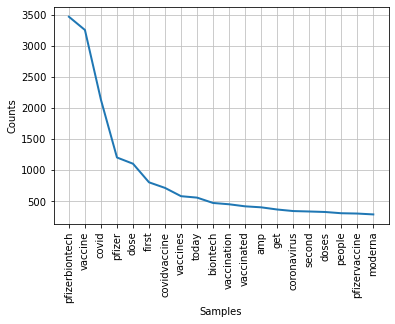

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
#The frequency of top 20 words from the tweets is plotted.
freq_dist.plot(20)

From the above graph it can be seen that the most common words are the brands on the vaccines in the market. The graphs tells us that the people are discussing about the first and the second vaccine which are approved and about getting the first doses.

(-0.5, 999.5, 599.5, -0.5)

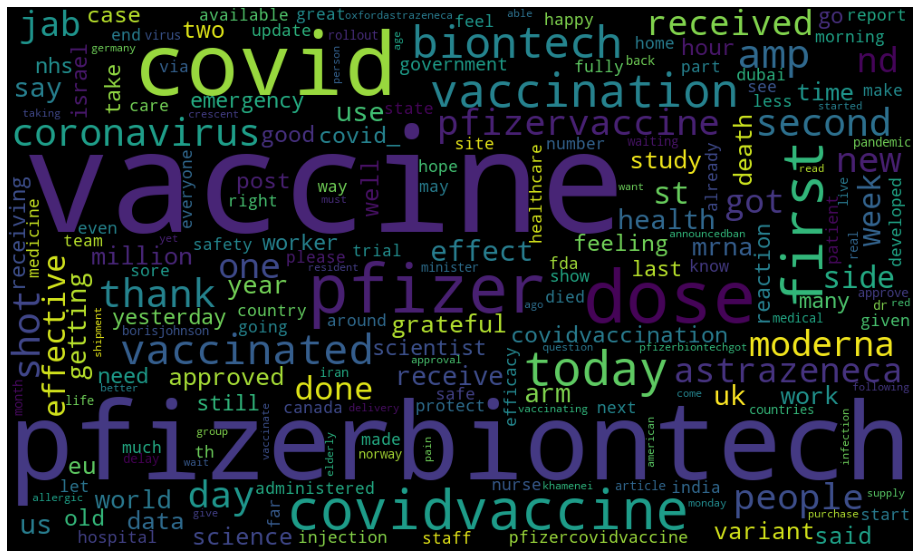

In [24]:
#wordcloud of the 200 words is visulaized 
tweet_wordcloud = WordCloud(width=1000,height=600, background_color='black', max_words=200, collocations=False).generate(all_tweets)
plt.figure(figsize=(20,10),facecolor='w')
plt.imshow(tweet_wordcloud)
plt.axis('off')


The above word cloud is about the overall sentiment of the people over the vaccine. People have discussed the most about the Pfizer vaccine. The word cloud summarizes people being grateful for being vaccinated and having received both doses. Jab is the new common word being used for vaccination. People are discussing the new variants as well as the new variant and affected the south Asian countries to a greater extent. Overall there are mixed reactions as people are worried about the side-effects and how the vaccine affects the old people but on the other hand, they are thankful as the vaccine is the only ultimate solution to end the pandemic.

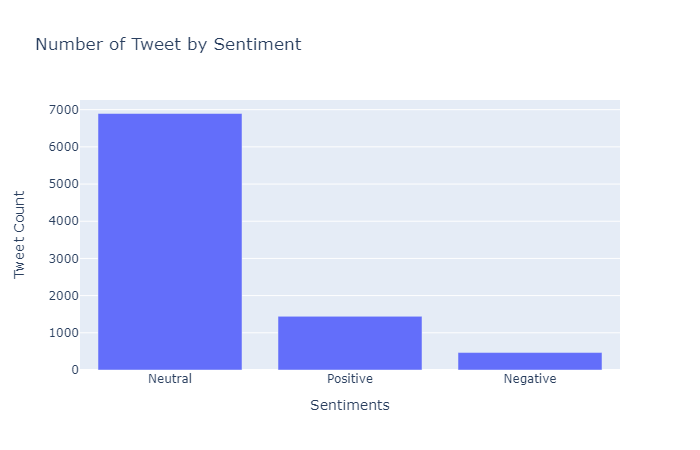

In [26]:
#Bar graph for the count of positive, negative and neutral sentiments in visualized.
twitter_sentiment_count=pd.DataFrame(tweet_dataset.groupby('Tweet_Sentiment').size().sort_values(ascending=False).rename('tweet_count').reset_index())
fig = px.bar(twitter_sentiment_count, x='Tweet_Sentiment', y='tweet_count',
             labels={
                     "Tweet_Sentiment": "Sentiments",
                     "tweet_count": "Tweet Count"
                 },
              title='Number of Tweet by Sentiment')
fig.show("png")

From the above bar graph, it can be summarized that the majority of the sentiments are neutral followed by positive and negative sentiments. The negative sentiments are the least in number as people are convinced that the ultimate remedy to the pandemic is vaccination.

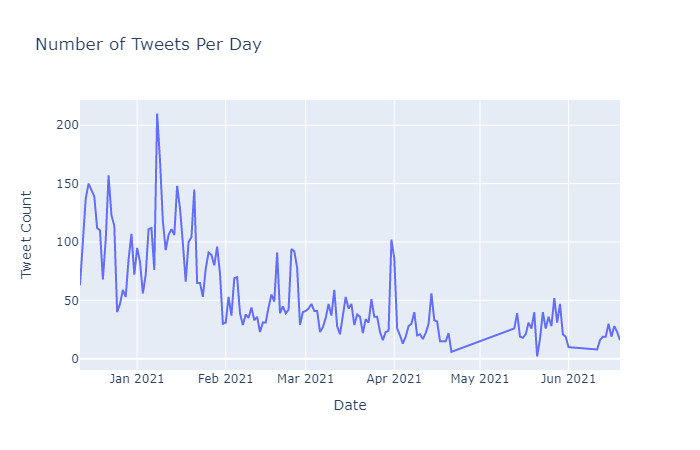

In [27]:
#A time series graph is plotted to see the total number tweets in regards to the date 
tweet_dataset['date'] = pd.to_datetime(tweet_dataset['date']).dt.date
tweets_per_day = pd.DataFrame(tweet_dataset.groupby('date').size().rename('tweet_count').reset_index())
fig = px.line(tweets_per_day,x='date',y='tweet_count',
              labels={
                     "date": "Date",
                     "tweet_count": "Tweet Count"
                 },
              title='Number of Tweets Per Day')
#fig.show()
fig.show("png")

The largest number of tweets were on 8th of January as that was the period when USA had experienced record number of deaths due to covid. The new variant from Africa was identified and people were concerned if the vaccine would work on the new vaccine.


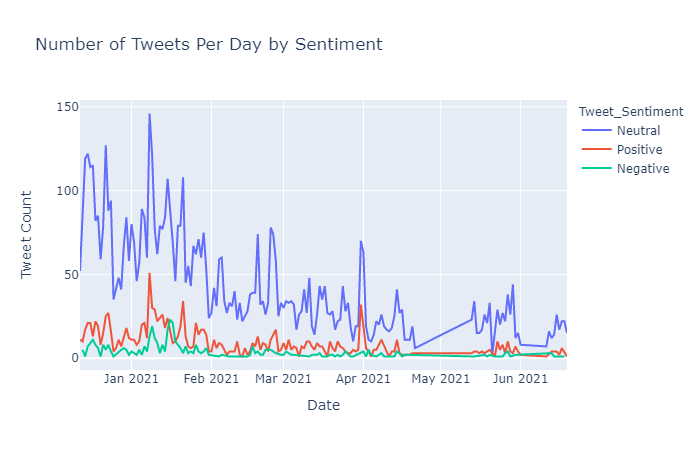

In [28]:
##A time series graph is plotted to see the total number of positive, negative and neutral tweets in regards to the date 
tweets_per_day_sentiment = pd.DataFrame(tweet_dataset.groupby(['date','Tweet_Sentiment']).size().rename('tweet_count').reset_index())
tweets_per_day_sentiment.head()
fig = px.line(tweets_per_day_sentiment,x='date',y='tweet_count', color='Tweet_Sentiment',
              labels={
                     "date": "Date",
                     "tweet_count": "Tweet Count"
                 },
              title='Number of Tweets Per Day by Sentiment')
#fig.show()
fig.show("png")

The above graph shows the tweet counts for negative, positive, and neutral sentiments. There were negative tweets on  8th January and 31st March. On 8th March the new variant was discovered and around the week of 31st March, the number of cases in India was rising.

(-0.5, 999.5, 599.5, -0.5)

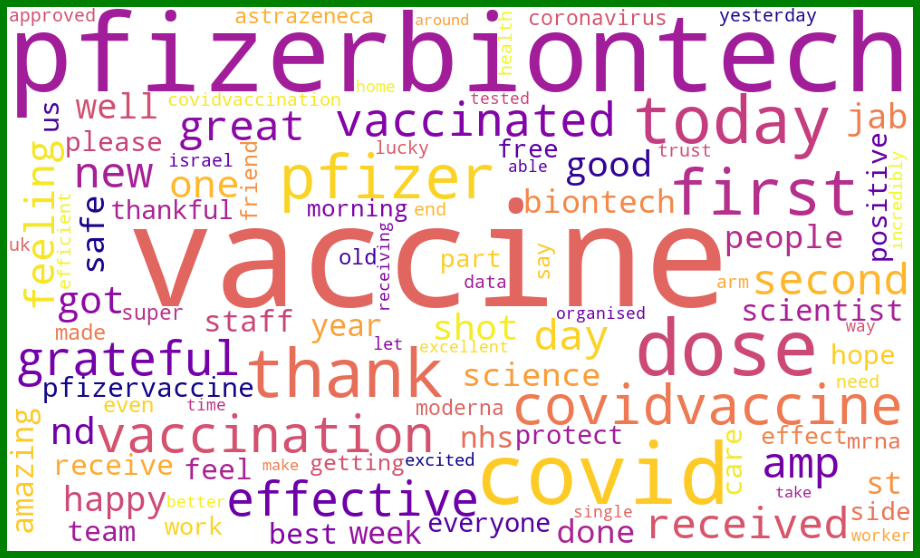

In [19]:
#The positive sentiment is visulaized by using a wordcloud 
clean_tweets_pos= "".join(list(tweet_dataset[tweet_dataset['Tweet_Sentiment']=='Positive']['Cleaned_Tweets'].values))
wordcloud_pos = WordCloud(width=1000,height=600, background_color='white',colormap='plasma', max_words=100, collocations=False).generate(clean_tweets_pos)
plt.figure(figsize=(20,10),facecolor='g')
plt.imshow(wordcloud_pos)
plt.axis('off')


The word cloud of positive sentiments summarizes that people are happy, thankful for receiving both the doses along with being excited as jabbed was the new social media trend. People are feeling safe and are grateful to the healthcare workers. Some even think they are lucky to receive the shots as many countries are facing vaccine shortage.


(-0.5, 999.5, 599.5, -0.5)

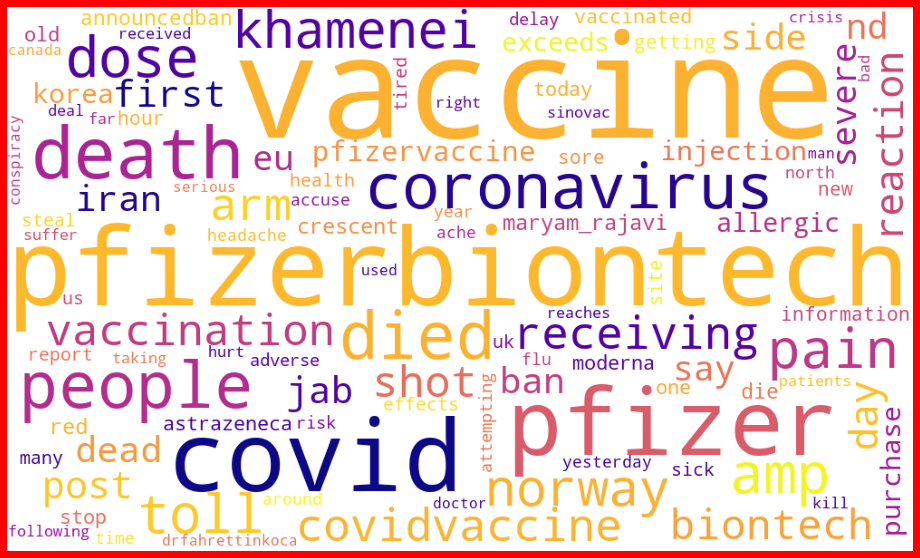

In [20]:
#The negative sentiment is visulaized by using a wordcloud 
clean_tweets_neg= "".join(list(tweet_dataset[tweet_dataset['Tweet_Sentiment']=='Negative']['Cleaned_Tweets'].values))
wordcloud_neg = WordCloud(width=1000,height=600, background_color='white',colormap='plasma', max_words=100, collocations=False).generate(clean_tweets_neg)
plt.figure(figsize=(20,10),facecolor='r')
plt.imshow(wordcloud_neg)
plt.axis('off')

The word cloud for the negative sentiments summarizes that people are worried about the adverse effects of the vaccine. It can be seen that pain, headache, and arm, sore, flu are the words being plotted which are some of the after-effects of the vaccine. In short, the negative sentiments depict the rumors and the after-effects of the vaccine.

In [ ]:
pip 